In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numexpr as ne
%run propagators_1d.py

In [2]:
energy = 1000
wavel = (1240/energy)*10**(-9)
pi = np.pi
N = 5000
L_in  = 5e-6

in_domain_exact  = np.linspace(-L_in/2,L_in/2,N)
sampling = in_domain_exact[1] - in_domain_exact[0]

in_wave = np.zeros(N)
in_wave[int(N/2)-int(N/8):int(N/2)+int(N/8)] = 1
out_wave_exact = np.zeros((N),dtype='complex128')

TF vs IR/1FT? : True
Fresnel Number : 20161.290322580648
TF vs IR/1FT? : False
Fresnel Number : 2016.1290322580646
TF vs IR/1FT? : False
Fresnel Number : 0.20161290322580647


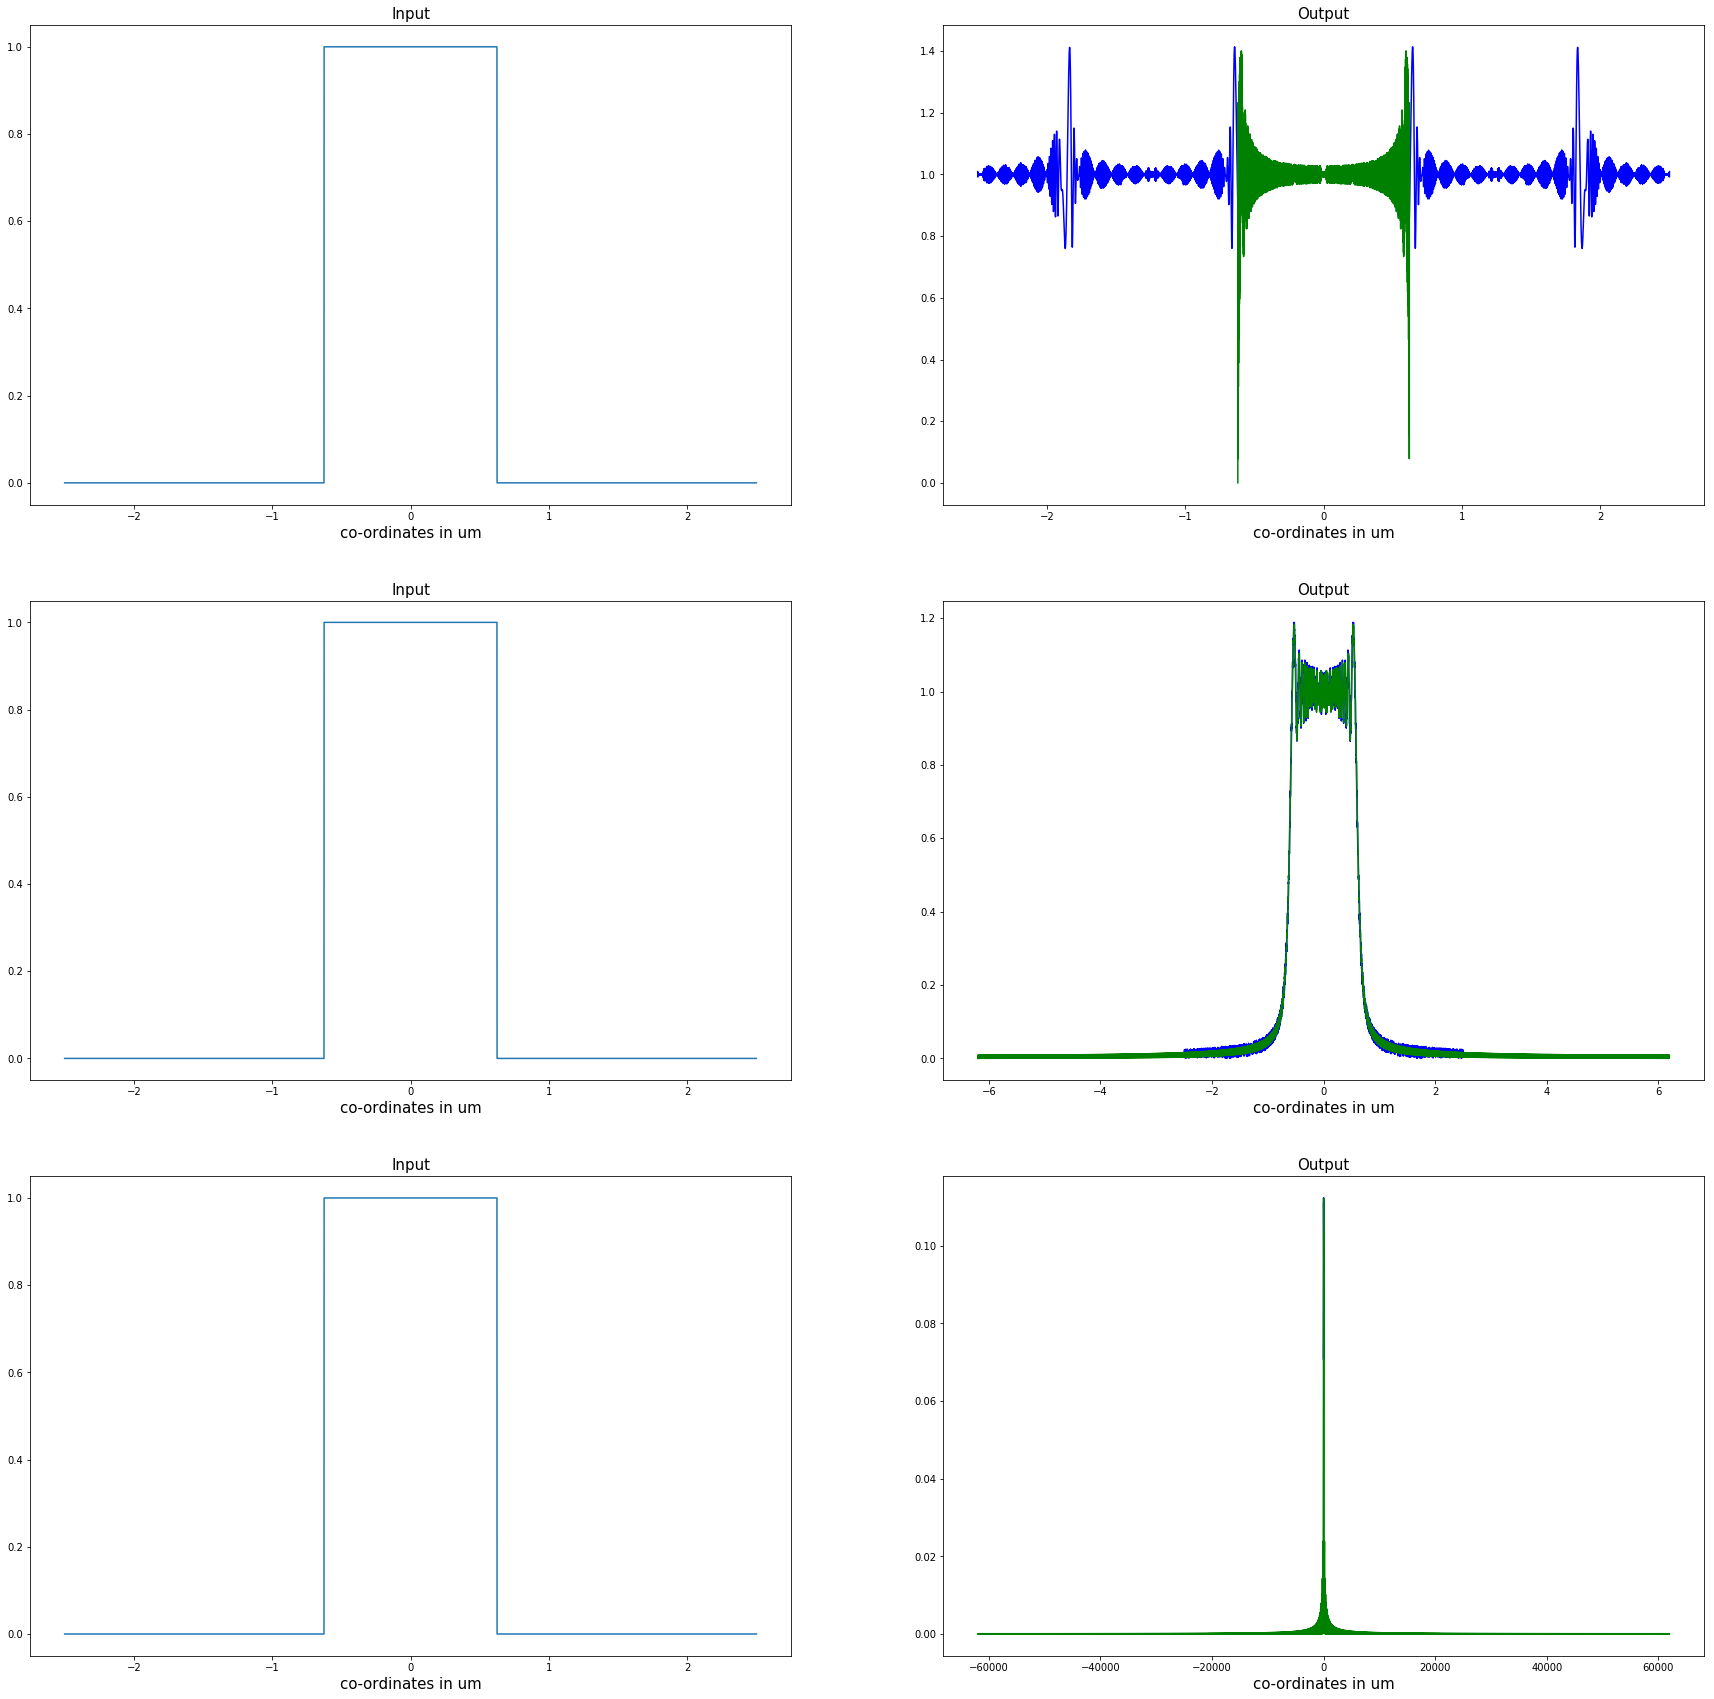

In [3]:
f, ax = plt.subplots(3,2)
i = 0
for z in [1e-6,10e-6,100e-3]:
    critical = (wavel*z/L_in)
    print('TF vs IR/1FT? :', sampling>critical)
    print('Fresnel Number :', (L_in**2)/(wavel*z))
    out_,L_ = prop1FT(in_wave,L_in/N,L_in,wavel,z)
    out_domain_ = np.linspace(-L_/2,L_/2,N)
    if i<2 :
        L_ = L_in
    else :
        L_ = L_in*20
    exact_prop(in_wave,out_wave_exact,L_in,L_,wavel,z)
    out_domain_exact = np.linspace(-L_/2,L_/2,N)
    ax[i,0].plot(in_domain_exact*1e6,np.abs(in_wave))
    ax[i,0].set_xlabel('co-ordinates in um',fontsize = 15)
    ax[i,0].set_title('Input', fontsize = 15)
    ax[i,1].plot(out_domain_exact*1e6, np.abs(out_wave_exact),'b')
    ax[i,1].plot(out_domain_*1e6, np.abs(out_),'g')
    ax[i,1].set_xlabel('co-ordinates in um',fontsize = 15)
    ax[i,1].set_title('Output', fontsize = 15)    
    i = i+1
    #f.suptitle('Fresnel Number : '+str((L_in**2)/(wavel*z)),fontsize = 25)
f.set_size_inches(30, 30, forward=True)
plt.show()